In [1]:
import pandas as pd
from openpyxl import load_workbook

def xlsx_sheet_to_df(filename:str,sheetname:str) -> pd.DataFrame:
    wb = load_workbook(filename)
    ws = wb[sheetname]
    data = list(ws.values)
    headers=next(iter(data))
    df_out = pd.DataFrame(data[1:],columns=headers)
    return(df_out)

df_destinations_test = xlsx_sheet_to_df(filename=r'./../data/destinations.xlsx',sheetname='Destinations')
df_destinations_test

,Country,Place,Type,Lat,Lon
0,Egypte,Hurghada,zon,27.222556,33.830706
1,Egypte,Marsa Alam,zon,25.069992,34.893817
2,Egypte,Sharm el Sheikh,zon,27.864442,34.295447
3,Italië,Rome,stad,41.893320,12.482932
4,Nederland,Ede,None,52.071683,5.745511
5,Spanje,Barcelona,stad,41.382894,2.177432
6,Spanje,Palma de Mallorca,zon,39.569582,2.650075
7,Egypte,Cairo,stad,30.044388,31.235726
8,Egypte,Luxor,zon,25.702096,32.647186
9,Turkije,Alanya,zon,36.886573,30.703024


In [1]:
import threading

In [2]:
import numpy as np
from geopy.geocoders import Nominatim

def xlsx_add_latlon(filename:str,sheetname:str):
    df_xlsx = xlsx_sheet_to_df(filename,sheetname)
    geolocator = Nominatim(user_agent='myapplication')
    boolean_overwrite = False
    for i,v in df_xlsx.iterrows():
        lat = v['Lat']
        # print(lat)
        # print(np.isnan(lat) or lat is None)
        if np.isnan(lat) or lat is None:
            boolean_overwrite = True
            dest = f"{v['Place']}, {v['Country']}"
            print(dest)
            loc = geolocator.geocode(dest)
            df_xlsx.loc[i,('Lat')]=float(loc.raw['lat'])
            df_xlsx.loc[i,('Lon')]=float(loc.raw['lon'])
    if boolean_overwrite:
        print(f'Added latlon to {filename}')
        df_xlsx.to_excel(filename,sheet_name=sheetname,index=False)
    return(df_xlsx)


# dfmi.loc[:, ('one', 'second')]
df_destinations = xlsx_add_latlon(filename=r'./../data/destinations.xlsx',sheetname='Destinations')
df_destinations

,Country,Place,Type,Lat,Lon
0,Egypte,Hurghada,zon,27.222556,33.830706
1,Egypte,Marsa Alam,zon,25.069992,34.893817
2,Egypte,Sharm el Sheikh,zon,27.864442,34.295447
3,Italië,Rome,stad,41.893320,12.482932
4,Nederland,Ede,None,52.071683,5.745511
5,Spanje,Barcelona,stad,41.382894,2.177432
6,Spanje,Palma de Mallorca,zon,39.569582,2.650075
7,Egypte,Cairo,stad,30.044388,31.235726
8,Egypte,Luxor,zon,25.702096,32.647186
9,Turkije,Alanya,zon,36.886573,30.703024


In [3]:
import numpy as np

def create_dict_destinations(df_destinations):
    cols = list(df_destinations.columns)
    dict_destinations = {}
    for i,v in df_destinations.iterrows():
        country = v['Country'].lower().replace(' ','-')
        place = v['Place'].lower().replace(' ','-')
        lat = v['Lat']
        if country not in dict_destinations:
            dict_destinations[country]={}
        dict_destinations[country][place] = {col:v[col] for col in cols}
        
        # if lat is None or np.isnan(lat):
        #     dict_latlon = add_latlon(country=v['Country'],place=v['Place'])
        #     dict_destinations[country][place].update(dict_latlon)
    return(dict_destinations)

dict_destinations = create_dict_destinations(df_destinations)
dict_destinations['spanje']

{'barcelona': {'Country': 'Spanje',
  'Place': 'Barcelona',
  'Type': 'stad',
  'Lat': 41.3828939,
  'Lon': 2.1774322},
 'palma-de-mallorca': {'Country': 'Spanje',
  'Place': 'Palma de Mallorca',
  'Type': 'zon',
  'Lat': 39.5695818,
  'Lon': 2.6500745},
 'malaga': {'Country': 'Spanje',
  'Place': 'Malaga',
  'Type': 'zon',
  'Lat': 36.7213028,
  'Lon': -4.4216366}}

In [8]:
from datetime import datetime,timedelta
from meteostat import Point, Daily, Hourly

def get_weather(lat,lon,start,end,frequency='daily'):
    if frequency=='daily':
        data = Daily(Point(lat,lon),start,end)
    elif frequency=='hourly':
        data = Hourly(Point(lat,lon),start,end)
    data = data.fetch()
    data = data[data.index<(datetime.now()-timedelta(days=1))]
    return data
        
    

# Marmaris, Turkey
# df_weather = get_weather(lat=36.8522547,lon=28.2742661,start=datetime(2024,1,1),end=datetime(2024,12,31),frequency='daily')
# Bodrum, Turkey
df_weather = get_weather(lat=37.0343987,lon=27.430651,start=datetime(2024,1,1),end=datetime(2024,12,31),frequency='daily')
df_weather.size

3620

In [351]:
# 10 nearst stations
stations = Stations()
stations = stations.nearby(36.8522547, 28.2742661)
station = stations.fetch(10)
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
17292,Mugla,TR,MUG,17292,<NA>,37.2000,28.3500,646.0,Europe/Istanbul,NaT,NaT,1963-01-17,2024-12-16,1949-01-01,2021-01-01,39247.640881
17295,Dalaman,TR,MUG,17295,LTBS,36.7000,28.7833,7.0,Europe/Istanbul,1986-06-24,2024-12-20,1995-11-17,2022-04-25,2008-01-01,2022-01-01,48394.924025
16749,Rhodes Airport,GR,LI,16749,LGRP,36.4000,28.0833,4.0,Europe/Athens,1935-01-01,2024-12-20,1973-01-28,2022-04-25,2013-01-01,2022-01-01,53097.446042
17290,Bodrum,TR,MUG,17290,LTBV,37.0333,27.4167,27.0,Europe/Istanbul,1963-01-01,2024-12-20,2007-02-10,2014-11-24,2013-01-01,2013-01-01,78826.409885
16740,Kos Island / Antimácheia,GR,LI,16740,<NA>,36.8000,27.1000,125.0,Europe/Athens,NaT,NaT,NaT,NaT,NaT,NaT,104678.485107
16742,Kos Airport,GR,LI,16742,LGKO,36.7833,27.0667,129.0,Europe/Athens,1982-10-01,2024-12-20,1986-09-27,2022-04-25,2011-01-01,2022-01-01,107765.800392
17234,Aydin,TR,AYI,17234,LTBD,37.8500,27.8500,57.0,Europe/Istanbul,1982-11-01,2024-12-20,1982-11-01,2024-12-16,1983-01-01,2022-01-01,117110.686909
17237,Denizli,TR,DEN,17237,<NA>,37.7667,29.0833,428.0,Europe/Istanbul,NaT,NaT,1973-01-01,2024-12-15,1973-01-01,2022-01-01,124332.393133
LTFB0,Izmir / Selçuk,TR,IZM,<NA>,LTFB,37.9507,27.3290,3.0,Europe/Istanbul,2007-01-27,2024-12-19,2013-05-29,2022-03-20,2015-01-01,2019-01-01,147952.287726


In [358]:

get_weather(lat=station['latitude'].iloc[0],lon=station['longitude'].iloc[0],start=datetime(2024,1,1),end=datetime(2024,12,31),frequency='daily')

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-01-01,9.9,8.7,12.6,0.3,NaN,124.0,9.1,NaN,1020.4,NaN
2024-01-02,8.7,6.0,10.9,12.7,NaN,119.0,7.4,NaN,1019.4,NaN
2024-01-03,8.3,4.9,11.1,6.9,NaN,136.0,9.2,NaN,1018.5,NaN
2024-01-04,9.9,6.8,12.6,2.8,NaN,177.0,11.3,NaN,1016.5,NaN
2024-01-05,9.3,8.5,16.1,9.9,NaN,356.0,8.2,NaN,1017.7,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-19,9.8,7.3,14.0,0.0,NaN,12.0,6.5,NaN,1018.5,NaN
2024-12-20,9.0,6.5,11.4,1.1,NaN,120.0,9.9,NaN,1016.0,NaN
2024-12-21,9.0,6.2,10.9,35.0,NaN,177.0,17.2,NaN,1014.7,NaN


In [279]:
timestamp = max(df_weather.index)-timedelta(days=7)
print(timestamp)
type(timestamp)
# datetime.fromtimestamp(timestamp)

2024-12-15 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [14]:
def get_weather_from_dict(start,end,dict_destinations,folder_data,frequency='daily',boolean_latest=True):
    for country in dict_destinations:
        for place in dict_destinations[country]:
            # Folder and file management:
            dir = os.path.join(folder_data,country,place)
            os.makedirs(dir,exist_ok=True)
            fp = os.path.join(dir,f'weather_{frequency}.csv')
            cp = dict_destinations[country][place]
            lat,lon = cp['Lat'],cp['Lon']
            boolean_download = (lat is not None and not np.isnan(lat)) and (lon is not None and not np.isnan(lon))
            boolean_file = os.path.isfile(fp)
            # boolean_download = boolean_download and place=='luxor' # TO DO, DELETE
            if boolean_download:
                if boolean_file:
                    # print(fp)
                    df_file = pd.read_csv(fp,index_col='time')
                    df_file.index = pd.to_datetime(df_file.index)
                    # df_file.index.freq = 'd' if frequency=='daily' else 'h'
                    if boolean_latest:
                        start_file = max(df_file.index)-timedelta(days=1)
                        end_file = datetime.today()
                        df_download = get_weather(lat=lat,lon=lon,start=start_file,end=end_file,frequency=frequency)
                    else:
                        end_history = min(end,datetime.today())
                        df_download = get_weather(lat=lat,lon=lon,start=start,end=end_history,frequency=frequency)
                    df_merge = pd.concat([df_file,df_download])
                    df_merge = df_merge[~df_merge.index.duplicated()]
                    df_merge = df_merge.sort_index()
                    df_merge.to_csv(fp,index=True)
                else:
                    end_history = min(end,datetime.today())
                    df_download = get_weather(lat=lat,lon=lon,start=start,end=end_history,frequency=frequency)
                    if df_download.size>0:
                        df_download.to_csv(fp,index=True)
                    else:
                        print(f'get_weather_from_dict(): empty data for {frequency} {country}, {place}')



In [13]:
min(datetime.today(),datetime(2050,12,31))

datetime.datetime(2024, 12, 28, 15, 2, 37, 90901)

In [17]:
import os
get_weather_from_dict(start=datetime(2018,1,1),end=datetime.today(),frequency='daily',dict_destinations=dict_destinations,folder_data=r'./../data/raw')

get_weather_from_dict(): empty data for daily egypte, marsa-alam
get_weather_from_dict(): empty data for daily turkije, marmaris


In [15]:
get_weather_from_dict(start=datetime(2020,1,1),end=datetime(2050,12,31),frequency='hourly',dict_destinations=dict_destinations,folder_data=r'./../data/raw')

get_weather_from_dict(): empty data for hourly egypte, marsa-alam


get_weather_from_dict(): empty data for hourly turkije, marmaris


In [231]:
folder_data = r'./../data3/'
dirs = os.path.join(folder_data,'egypte','marsa-alam')
fp = os.path.join(dirs,'daily.csv')

os.makedirs(dirs,exist_ok=True)
df_weather.to_csv(fp,index=True)



In [235]:
pd.read_csv(fp,index_col='time')

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-01-01,15.6,14.1,17.4,4.6,NaN,66.0,3.6,NaN,1019.2,NaN
2024-01-02,15.1,10.0,18.8,1.7,NaN,84.0,4.4,NaN,1018.5,NaN
2024-01-03,16.8,11.0,20.0,1.3,NaN,195.0,6.9,NaN,1017.4,NaN
2024-01-04,17.9,16.5,20.0,1.8,NaN,205.0,9.3,NaN,1015.0,NaN
2024-01-05,17.5,13.0,22.0,0.2,NaN,2.0,3.8,NaN,1017.4,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-18,14.0,10.4,19.1,0.0,NaN,17.0,4.0,18.5,1024.1,NaN
2024-12-19,15.1,12.0,19.2,0.0,NaN,73.0,3.3,13.0,1018.7,NaN
2024-12-20,15.9,13.1,18.9,4.0,NaN,123.0,10.6,25.9,1015.1,NaN


In [228]:
import os
os.makedirs(r'./../data2/turkije/bodrum2', exist_ok=True)

In [ ]:
# TO DO:
def add_translations(filename,list_cols):
    """Output: {}""""
    for col in list_cols:
        sheetname

add_translations(filename=r'./../data/vakantieweer_destinations.xlsx',list_cols=['Country','Place','Type'])

In [203]:
from geopy.geocoders import Nominatim

def xlsx_add_latlon(filename:str,sheetname:str):
    df_xlsx = xlsx_sheet_to_df(filename,sheetname)
    geolocator = Nominatim(user_agent='myapplication')
    boolean_overwrite = False
    for i,v in df_xlsx.iterrows():
        lat = v['Lat']
        if True: #np.isnan(lat) or lat is None:
            boolean_overwrite = True
            dest = f"{v['Place']}, {v['Country']}"
            print(dest)
            loc = geolocator.geocode(dest)
            # loc = geolocator.geocode(f"{v['Place']}, {v['Country']}")
            df_xlsx.iloc[i]['Lat']=float(loc.raw['lat'])
            df_xlsx.iloc[i]['Lon']=float(loc.raw['lon'])
    if boolean_overwrite:
        df_xlsx.to_excel(filename,sheet_name=sheetname)
    return(df_xlsx)
        
df_xlsx = xlsx_add_latlon(filename=r'./../data/destinations.xlsx',sheetname='Destinations')
    

Hurghada, Egypte
Marsa Alam, Egypte


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Sharm el Sheikh, Egypte
Rome, Italië
Ede, Nederland
Barcelona, Spanje
Palma de Mallorca, Spanje
Cairo, Egypte


In [204]:
df_xlsx

,Country,Place,Type,Lat,Lon
0,Egypte,Hurghada,zon,27.222556,33.830706
1,Egypte,Marsa Alam,zon,25.069992,34.893817
2,Egypte,Sharm el Sheikh,zon,27.864442,34.295447
3,Italië,Rome,stad,41.893320,12.482932
4,Nederland,Ede,None,52.071683,5.745511
5,Spanje,Barcelona,stad,41.382894,2.177432
6,Spanje,Palma de Mallorca,zon,39.569582,2.650075
7,Egypte,Cairo,stad,NaN,NaN


In [199]:
from openpyxl.utils.dataframe import dataframe_to_rows

filename = r'./../data/vakantieweer_destinations.xlsx'
sheetname = 'Destinations'

wb = load_workbook(filename)
ws = wb[sheetname]

df_xlsx.to_excel(filename,sheet_name='destinations')

# rows = dataframe_to_rows(df_xlsx, index=False)
# for r_idx, row in enumerate(rows, 1):  # Start writing data from the first row
#     for c_idx, value in enumerate(row, 1):
#         ws.cell(row=r_idx, column=c_idx, value=value)
#         print(value)
# # wb.save(filename)

KeyError: 'Worksheet Destinations does not exist.'

In [175]:
from geopy.geocoders import Nominatim

def add_latlon(country,place):
    """Output: {'lat':0, 'lon':0}"""
    geolocator = Nominatim(user_agent='myapplication')
    loc = geolocator.geocode(f'{place}, {country}')
    dict_latlon = {'Lat':float(loc.raw['lat']),'Lon':float(loc.raw['lon'])}
    return dict_latlon

add_latlon('Nederland','Amsterdam')

{'Lat': 52.3730796, 'Lon': 4.8924534}

In [172]:


# dict_destinations = {}
# def create_dict_destinations(df_destinations):
#     cols = list(df_destinations.columns)
#     dict_destinations = {}
#     for i,v in df_destinations.iterrows():
#         dest = f"{v['Country']}, {v['Place']}"
#         dict_destinations[dest] = {col:v[col] for col in cols}
#         dict_destinations[dest]['Slug-Country']=v['Country'].lower().replace(' ','-')
#         dict_destinations[dest]['Slug-Place']=v['Place'].lower().replace(' ','-')
#     return(dict_destinations)

# dict_destinations = create_dict_destinations(df_destinations)
# dict_destinations

In [163]:
from geopy.geocoders import Nominatim


def get_lat_lon(dict_destinations):
    geolocator = Nominatim(user_agent='myapplication')
    for dest in dict_destinations:
        if dict_destinations[dest]['Lat'] is None:
            print(f'get_lat_lon() for {dest}')
            loc = geolocator.geocode(dest)
            dict_destinations[dest]['Lat']=float(loc.raw['lat'])
            dict_destinations[dest]['Lon']=float(loc.raw['lon'])
    return(dict_destinations)
            
dict_destinations = get_lat_lon(dict_destinations)
dict_destinations

KeyError: 'Lat'

In [ ]:
def 

In [160]:
# def update_xlsx_destinations(dict_destinations,filename,sheetname='Destinations'):
#     df_destinations = xlsx_sheet_to_df(filename,sheetname)
#     for dest in dict_destinations:
#         print(dest)
#         print(df_destinations[df_destinations['Place']==]['Lat'])

#     print(df_destinations)

# update_xlsx_destinations(dict_destinations,filename=r'./../data/vakantieweer_destinations.xlsx',sheetname='Destinations')

Egypte, Hurghada
Egypte, Sharm el Sheikh
Egypte, Marsa Alam
Spanje, Palma de Mallorca
Spanje, Barcelona
Nederland, Ede
Italië, Rome
     Country              Place   Lat   Lon
0     Egypte           Hurghada  None  None
1     Egypte    Sharm el Sheikh  None  None
2     Egypte         Marsa Alam  None  None
3     Spanje  Palma de Mallorca  None  None
4     Spanje          Barcelona  None  None
5  Nederland                Ede  None  None
6     Italië               Rome  None  None


In [1]:
# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31, 23, 59)

# Get hourly data
data = Hourly('72219', start, end)
data = data.fetch()

# Print DataFrame
print(data)

                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2018-01-01 00:00:00   0.6  -5.6  63.0   NaN   NaN  340.0  18.4   NaN  1024.6   
2018-01-01 01:00:00  -1.1  -6.6  66.0   0.0   NaN  320.0  16.6   NaN  1025.4   
2018-01-01 02:00:00  -1.1  -9.5  53.0   0.0   NaN  330.0  22.3   NaN  1025.8   
2018-01-01 03:00:00  -1.1 -10.0  51.0   0.0   NaN  330.0  25.9   NaN  1025.6   
2018-01-01 04:00:00  -1.7 -10.5  51.0   0.0   NaN  340.0  18.4   NaN  1026.1   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2018-12-31 19:00:00  20.0  17.2  84.0   0.0   NaN  200.0  18.4   NaN  1016.5   
2018-12-31 20:00:00  21.1  16.7  76.0   0.0   NaN  190.0  22.3   NaN  1015.8   
2018-12-31 21:00:00  21.1  16.1  73.0   0.0   NaN  180.0  27.7   NaN  1014.7   
2018-12-31 22:00:00  21.1  15.0  68.0   0.0   NaN  190.0  27.7   NaN  1015.7   
2018-12-31 23:00:00  20.0  15.0  73.0   

In [2]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 6.9 MB/s eta 0:00:00


In [117]:
from typing import List, Dict, Tuple, Optional
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

list_destinations = ['Hurghada, Egypte','Sharm el Sheikh, Egypte','Palma de Mallorca, Spanje','Barcelona, Spanje','Marsa Alam, Egypte','Lunteren, Nederland','Malaga, Spanje','Casablanca, Marokko','Buenos Aires, Argentinië']
# dict_destinations = {}

def get_lat_lon(list_destinations: List[str],dict_destinations:Dict[str, Tuple[float, float]]) -> Dict[str, Tuple[float, float]]:
    for dest in list_destinations:
        if dest not in dict_destinations:
            print(f'get_lat_lon() for {dest}')
            loc = geolocator.geocode(dest)
            dict_destinations[dest]={
                'lat':float(loc.raw['lat']),
                'lon':float(loc.raw['lon']),
            }
    return dict_destinations

dict_destinations = get_lat_lon(list_destinations,dict_destinations)
dict_destinations

get_lat_lon() for Buenos Aires, Argentinië


{'Hurghada, Egypte': {'lat': 27.222556, 'lon': 33.8307062},
 'Sharm el Sheikh, Egypte': {'lat': 27.8644422, 'lon': 34.295447},
 'Palma de Mallorca, Spanje': {'lat': 39.5695818, 'lon': 2.6500745},
 'Barcelona, Spanje': {'lat': 41.3828939, 'lon': 2.1774322},
 'Marsa Alam, Egypte': {'lat': 25.069992, 'lon': 34.893817},
 'Lunteren, Nederland': {'lat': 52.0864617, 'lon': 5.6190737},
 'Malaga, Spanje': {'lat': 36.7213028, 'lon': -4.4216366},
 'Casablanca, Marokko': {'lat': 33.5945144, 'lon': -7.6200284},
 'Buenos Aires, Argentinië': {'lat': -34.6083696, 'lon': -58.4440583}}

In [119]:
# Import Meteostat library and dependencies
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly
from typing import List, Dict, Tuple, Optional
import pandas as pd

# Set time period
start = datetime(2020, 1, 1)
end = datetime(2025, 12, 31)

# place = dict_destinations''
# place = list(dict_destinations.keys())[-1]
# place_point = Point(dict_destinations[place]['lat'],dict_destinations[place]['lon'])
# data = Daily(place_point, start, end)
# data = data.fetch()
# data.plot(y=['tavg', 'tmin', 'tmax'])
# plt.show()
# data.head()

def get_weather(
    destination: str,
    start: datetime, 
    end: datetime,
    dict_destinations: Dict[str, Tuple[float, float]],
    frequency:str = 'daily',
    cols_keep: Optional[List[str]]=None
) -> pd.DataFrame:
    point = Point(dict_destinations[destination]['lat'],dict_destinations[destination]['lon'])
    if frequency=='daily':
        
        data = Daily(point, start, end)
    else:
        data = Hourly(point, start, end,model=True)
    data = data.fetch()
    data = data[data.index<(datetime.now()-timedelta(days=1))]
    if cols_keep is not None:
        data = data[[col for col in data.columns if col in cols_keep]]
    
    data[data.select_dtypes(include=['float64']).columns] = data.select_dtypes(include=['float64']).round(1)
    print(destination)
    return data

cols_keep = ['tmin','tmax','prcp','snow','wdir','wspd','wpgt','pres','tsun']
cols_keep = ['tavg','tmin','tmax','prcp','pres','rhum','snow','temp','wdir','wspd']
# cols_keep=None
data_daily = get_weather(
    destination=list(dict_destinations.keys())[-1],
    start=start,end=end,dict_destinations=dict_destinations,
    frequency='daily',
    cols_keep=cols_keep)
data_hourly = get_weather(
    destination=list(dict_destinations.keys())[-1],
    start=start,end=end,dict_destinations=dict_destinations,
    frequency='hourly',
    cols_keep=cols_keep)

data_hourly

Buenos Aires, Argentinië


Buenos Aires, Argentinië


,temp,rhum,prcp,snow,wdir,wspd,pres
time,,,,,,,
2020-01-01 00:00:00,25.2,73.0,NaN,NaN,140.0,14.8,1008.5
2020-01-01 01:00:00,24.1,83.0,NaN,NaN,140.0,13.0,1009.7
2020-01-01 02:00:00,23.2,74.0,NaN,NaN,110.0,18.4,1010.6
2020-01-01 03:00:00,22.1,82.0,NaN,NaN,110.0,13.0,1011.2
2020-01-01 04:00:00,21.7,82.0,NaN,NaN,110.0,11.2,1011.4
...,...,...,...,...,...,...,...
2024-12-20 09:00:00,22.3,70.0,0.0,NaN,295.0,5.5,1004.8
2024-12-20 10:00:00,22.7,69.0,0.0,NaN,277.0,5.5,1005.2
2024-12-20 11:00:00,24.2,63.0,0.0,NaN,252.0,5.5,1005.5


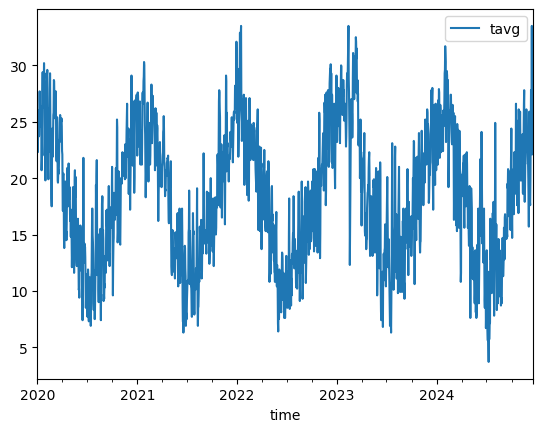

In [124]:
data_daily.plot(y=['tavg'])
# data_hourly.plot(y=['temp'])
plt.show()

In [122]:
import pandas as pd
import io

def estimate_csv_size_kb(df: pd.DataFrame) -> float:
  """
  Estimates the size of the DataFrame in kilobytes when saved as a CSV file.

  Args:
      df: The pandas DataFrame.

  Returns:
      An float representing the estimated size of the CSV file in kilobytes.
  """
  try:
    buffer = io.StringIO() 
    df.to_csv(buffer, index=False) 
    buffer.seek(0, 2)  
    size_bytes = buffer.tell() 
    size_kb = size_bytes / 1024 
    return size_kb
  except Exception as e:
    print(f"Error estimating CSV size: {e}")
    return 0

print(estimate_csv_size_kb(data_hourly))
print(estimate_csv_size_kb(data_daily))

1329.07421875
64.1025390625


In [22]:
def calculate_distance():
    pass

In [45]:
from meteostat import Stations

dict_stations = {}
def get_station_nearby(dict_stations:Dict[str, Tuple[str, str]],dict_destinations:Dict[str, Tuple[str, str]]) -> Dict[str, Tuple[str, str]]:
    stations = Stations()
    for dest in dict_destinations:
        if dest not in dict_stations:
            print(f'get_station_nearby() for {dest}')
            dest_station = stations.nearby(dict_destinations[dest]['lat'],dict_destinations[dest]['lon']).fetch(1)
            dict_stations[dest] = {
                dest_station['latitude'].iloc[0],
                dest_station['longitude'].iloc[0],
                # dest_station['id'].iloc[0],
                round(dest_station['distance'].iloc[0])/1000
            }
            print(dest_station)
            # print(dest_station['latitude'].iloc[0])
            # print(dest_station['longitude'].iloc[0])
            # print(dest_station['distance'].iloc[0])
            # print()
            # dict_stations[dest]={}
    return dict_stations

dict_stations = get_station_nearby(dict_stations,dict_destinations)
dict_stations

get_station_nearby() for Hurghada, Egypte
           name country region    wmo  icao  latitude  longitude  elevation  \
id                                                                            
62463  Hurguada      EG    BAM  62463  HEGN     27.15    33.7167       16.0   

           timezone hourly_start hourly_end daily_start  daily_end  \
id                                                                   
62463  Africa/Cairo   1990-02-15 2024-12-15  1990-02-15 2024-12-02   

      monthly_start monthly_end      distance  
id                                             
62463    1990-01-01  2021-01-01  13865.367048  
get_station_nearby() for Sharm el Sheikh, Egypte
                  name country region    wmo  icao  latitude  longitude  \
id                                                                        
62460  Sharm El Sheikh      EG    JNS  62460  <NA>   27.9667    34.3833   

       elevation      timezone hourly_start hourly_end daily_start daily_end  \
id        

{'Hurghada, Egypte': {13.865, 27.15, 33.7167},
 'Sharm el Sheikh, Egypte': {14.276, 27.9667, 34.3833},
 'Palma de Mallorca, Spanje': {2.039, 2.7028, 39.5989},
 'Barcelona, Spanje': {2.1333, 5.261, 41.4167},
 'Marsa Alam, Egypte': {26.1333, 34.2167, 136.343}}